<a href="https://colab.research.google.com/github/saanvinaik/Comment-Toxicity-Detection/blob/main/Comment_Toxicity_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [5]:
device_name = '/device:GPU:0'

In [6]:
os.path.join("D:","Comment-Toxicity","train.csv","train.csv")

'D:/Comment-Toxicity/train.csv/train.csv'

In [7]:
# df = pd.read_csv(os.path.join("D:","Comment-Toxicity","train.csv","train.csv"))
df = pd.read_csv("/content/drive/MyDrive/Comment-Toxicity/train.csv/train.csv")

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [10]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
df[df.columns[:2]]

,id,comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember..."
...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ..."
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ..."
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...


In [12]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [13]:
df[df['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [14]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [15]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [16]:
#Preprocessing Comments
from tensorflow.keras.layers import TextVectorization

In [17]:
TextVectorization??

In [18]:
X=df['comment_text']
Y=df[df.columns[2:]].values #converts data into vector 

In [19]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [20]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
MAX_FEATURES = 200000 #total no of words

In [22]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES , 
                               output_sequence_length=1500,
                              output_mode='int')

In [23]:
vectorizer.adapt(X.values)
vectorizer.get_vocabulary()
#passing X as numpy arrays instead of pandas series

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [24]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [25]:
vectorizer('Hi Hello')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([171, 288])>

In [26]:
vectorized_text_x = vectorizer(X.values) #vectorization for x i.e tokenize

In [27]:
len(X)

159571

In [28]:
vectorized_text_x

<tf.Tensor: shape=(159571, 1500), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [29]:
#Creation of tensorflow data pipeline
#used for data that can't fit into memory

#pipeline generation - map , cache , shuffle , batch , prefetch
#tensor_slices or list_file

ds = tf.data.Dataset.from_tensor_slices((vectorized_text_x,Y)) #passing data
ds = ds.cache()
ds = ds.shuffle(160000) #160000 here is buffer size
ds = ds.batch(16) #batch representation i.e series of samples
ds = ds.prefetch(8) #helps prevent bottlenecks

In [30]:
batch_X  , batch_Y = ds.as_numpy_iterator().next()

In [31]:
batch_X.shape #16 samples and 1500 max word count

(16, 1500)

In [32]:
batch_Y.shape #16 samplees and 6 cols

(16, 6)

In [33]:
len(ds)

9974

In [34]:
#for training
int(len(ds)*.7)

6981

In [35]:
#Creating Training , Validation and test partition
train = ds.take(int(len(ds)*.7)) #70%
val = ds.skip(int(len(ds)*.7)).take(int(len(ds)*.2)) #skip training 70% and take another 20%
test = ds.skip(int(len(ds)*.9)).take(int(len(ds)*.1)) #skip 90% and take last 10%

In [36]:
len(train)

6981

In [37]:
len(val)

1994

In [38]:
len(test)

997

In [39]:
train_generator = train.as_numpy_iterator() #getting batches

In [40]:
train_generator.next() #getting next batch 

(array([[   94, 10272,   345, ...,     0,     0,     0],
        [    9,    41,     6, ...,     0,     0,     0],
        [  191, 85004,   288, ...,     0,     0,     0],
        ...,
        [  288,   171,    41, ...,     0,     0,     0],
        [   70,  1253,     8, ...,     0,     0,     0],
        [  878,    76,    20, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [41]:
#Create Sequential Model
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import LSTM ,Dense, Dropout, Embedding , Bidirectional

In [43]:
with tf.device(device_name):
      model = Sequential() #api
      #embedding layer
      model.add(Embedding(MAX_FEATURES+1 , 32)) #no of words + 1 for unknown
      #lstm layer , gpu accleration req tanh , by tensorflow 
      #bi - pass info both ways
      model.add(Bidirectional(LSTM(32,activation='tanh')))
      #dense , feature extractor fully connected layers
      model.add(Dense(128, activation='relu'))
      model.add(Dense(256, activation='relu'))
      model.add(Dense(128, activation='relu'))
      #final layer , 6 coz 6 diff values
      #converts the o/p from 3rd dense into sigmoid value ie between 0 and 1
      model.add(Dense(6, activation='sigmoid'))

      model.compile(loss='BinaryCrossentropy', optimizer='Adam')
      #6 diff bi nary classifier
      #6 diff binary classifier not categorical , optimizer - std

      model.summary()
      hist = model.fit(train , epochs=1 , validation_data = val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [44]:
hist.history

{'loss': [0.06290632486343384], 'val_loss': [0.047155775129795074]}

In [45]:
model.save('comment-training.h5')

In [46]:
# loaded_model = load_model('comment-training.h5')

<Figure size 800x500 with 0 Axes>

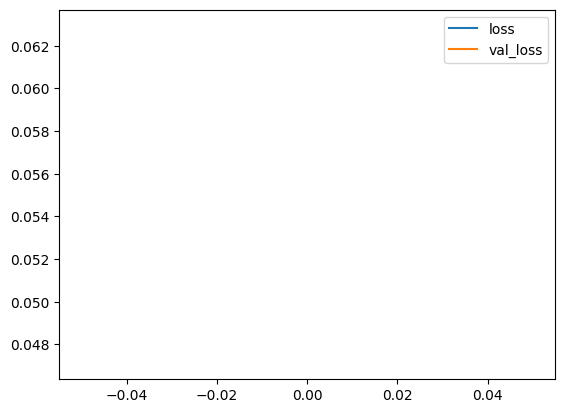

In [47]:
from matplotlib import pyplot as plt
import pandas as pd
plt.figure(figsize=(8,5))
pd.DataFrame(hist.history).plot()
plt.show()

In [48]:
from tensorflow.keras.models import load_model

In [49]:
loaded_model = load_model('comment-training.h5')
# loaded_model.summary()


In [50]:
#Predictions
input_t = vectorizer('You suck')

In [51]:
#generating new batch
batch_X , batch_Y = test.as_numpy_iterator().next()

In [52]:
input_t 

<tf.Tensor: shape=(1500,), dtype=int64, numpy=array([  7, 397,   0, ...,   0,   0,   0])>

In [53]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [54]:
model.predict(np.expand_dims(input_t,0))

1/1 [==============================] - 1s 690ms/step


array([[0.96838033, 0.13392217, 0.81274927, 0.03135017, 0.6145162 ,
        0.10436722]], dtype=float32)

In [55]:
res = model.predict(np.expand_dims(input_t,0))


1/1 [==============================] - 0s 49ms/step


In [56]:
model.predict(batch_X) > 0.5

1/1 [==============================] - 0s 55ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [57]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 56ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [58]:
batch_Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [59]:
batch_X

array([[ 115,  384,   78, ...,    0,    0,    0],
       [3523,  433,  104, ...,    0,    0,    0],
       [   8,   19, 4986, ...,    0,    0,    0],
       ...,
       [  48, 8692,    5, ...,    0,    0,    0],
       [   1,  163,   59, ...,    0,    0,    0],
       [7477,    4,   30, ...,    0,    0,    0]])

In [60]:
predictions = loaded_model.predict(np.expand_dims(input_t,0))
# model.predict(np.expand_dims(input_t,0))


1/1 [==============================] - 1s 772ms/step


In [61]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [62]:
predictions

array([[0.96838033, 0.13392217, 0.81274927, 0.03135017, 0.6145162 ,
        0.10436722]], dtype=float32)

**Evaluation of Model**

In [63]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [64]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [65]:
for batch in test.as_numpy_iterator():
  #unpack batch
  X_true , Y_true = batch
  #make a prediction
  x_eval_predict = model.predict(X_true)

  #flatten predictions
  Y_true = Y_true.flatten()
  x_eval_predict = x_eval_predict.flatten()

  pre.update_state(Y_true,x_eval_predict)
  re.update_state(Y_true,x_eval_predict)
  acc.update_state(Y_true,x_eval_predict)


1/1 [==============================] - 0s 51ms/step


In [66]:
print("Precision",pre.result().numpy())
print("Recall",re.result().numpy())
print("Accuracy",acc.result().numpy())

Precision 0.829243
Recall 0.6877867
Accuracy 0.46038115


In [67]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.6 MB/s eta 0:00:00
  Preparing metad

In [68]:
import gradio as gr

In [69]:
model = tf.keras.models.load_model('comment-training.h5')

In [70]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [71]:
input_text = vectorizer("kill all niggers")

In [72]:
final = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 900ms/step


In [73]:
final

array([[0.9909422 , 0.28775552, 0.92874885, 0.03736038, 0.7546154 ,
        0.13977776]], dtype=float32)

In [74]:
def score(comment):
  vectorized = vectorizer([comment])
  final_result = model.predict(vectorized)

  text = ''
  for idx , col in enumerate(df.columns[2]):
    text += '{}: {}\n'.format(col,final_result[0][idx]>0.4)

  for idx , col in enumerate(df.columns[3]):
    text += '{}: {}\n'.format(col,final_result[0][idx]>0.1)

  for idx , col in enumerate(df.columns[4]):
    text += '{}: {}\n'.format(col,final_result[0][idx]>0.4)

  for idx , col in enumerate(df.columns[5]):
    text += '{}: {}\n'.format(col,final_result[0][idx]>0.1)

  for idx , col in enumerate(df.columns[6]):
    text += '{}: {}\n'.format(col,final_result[0][idx]>0.4)

  for idx , col in enumerate(df.columns[7]):
    text += '{}: {}\n'.format(col,final_result[0][idx]>0.1)

  
  return text

In [75]:
interface = gr.Interface(fn=score , inputs=gr.inputs.Textbox(
    lines=2,placeholder='Comment'),outputs='text'
)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [76]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0d095a8d8e79e3b52a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
